# IMPORT LIBRARIES AND DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')


# Read a CSV file

In [2]:
Customer_info = pd.read_csv('CustomerInfo.csv')
buyscooter = pd.read_csv('buyscooter.csv')
test = pd.read_csv('testdata.csv')

In [3]:
Customer_info.iloc[1,2]

'L'

In [4]:
Customer_info[['CustomerID','FirstName','PostalCode']]

,CustomerID,FirstName,PostalCode
0,11000,Jon,4700
1,11001,Eugene,3198
2,11002,Ruben,7001
3,11003,Christy,2113
4,11004,Elizabeth,2500
...,...,...,...
14399,27213,Julia,99202
14400,27214,Bianca,90210
14401,27216,Ana,91776
14402,27217,Julia,98055


In [5]:
Customer_info.shape

(14404, 19)

# Missing Value Treatment

In [6]:
Customer_info.head(2)

,CustomerID,FirstName,MiddleName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Jon,V,Yang,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Eugene,L,Huang,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141


In [7]:
buyscooter.head()

,CustomerID,BuyScooter
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


# Merge our buyscooter with Customer info to give Train Data

In [8]:
train =pd.merge(Customer_info, buyscooter, on=['CustomerID'], how='left')

In [9]:
train.head(3)

,CustomerID,FirstName,MiddleName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter
0,11000,Jon,V,Yang,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,Eugene,L,Huang,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,Ruben,NaN,Torres,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,0


In [10]:
test.isnull().sum()

CustomerID                0
FirstName                 0
MiddleName              829
LastName                  0
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
dtype: int64

In [11]:
train.isnull().sum()

CustomerID                 0
FirstName                  0
MiddleName              6122
LastName                   0
City                       0
StateProvinceName          0
CountryRegionName          0
PostalCode                 0
PhoneNumber                0
BirthDate                  0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
BuyScooter                 0
dtype: int64

In [12]:
#axis = 1 - means the column axis, 0 is for row. inplace - make changes permanent
train.drop('MiddleName', axis = 1,inplace=True)
test.drop('MiddleName', axis = 1,inplace=True)

In [13]:
train.dtypes

CustomerID               int64
FirstName               object
LastName                object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BuyScooter               int64
dtype: object

In [14]:
test.dtypes

CustomerID               int64
FirstName               object
LastName                object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

# Handle Date format

In [15]:
train['bday'] =pd.to_datetime(train['BirthDate'])
test['bday'] =pd.to_datetime(test['BirthDate'])

In [16]:
train.head(2)

,CustomerID,FirstName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,bday
0,11000,Jon,Yang,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,0,1966-08-04
1,11001,Eugene,Huang,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,1,1965-05-14


In [17]:
train[['BirthDate', 'bday']]

,BirthDate,bday
0,08/04/1966,1966-08-04
1,14/05/1965,1965-05-14
2,12/08/1965,1965-12-08
3,15/02/1968,1968-02-15
4,08/08/1968,1968-08-08
...,...,...
14399,07/01/1956,1956-07-01
14400,03/06/1956,1956-03-06
14401,27/10/1956,1956-10-27
14402,05/01/1957,1957-05-01


In [18]:
train.dtypes

CustomerID                       int64
FirstName                       object
LastName                        object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate                       object
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
BuyScooter                       int64
bday                    datetime64[ns]
dtype: object

In [19]:
train.drop('BirthDate', axis = 1,inplace=True)
test.drop('BirthDate', axis = 1,inplace=True)

# Data Manipulation

In [20]:
train.Occupation.unique()

array(['Professional', 'Management', 'Skilled Manual', 'Clerical',
       'Manual'], dtype=object)

In [21]:
train['Occupation']=train['Occupation'].replace({'Professional':5, 'Management':4, 'Clerical':3, 'Skilled Manual':2, 'Manual':1})

In [22]:
test['Occupation']=test['Occupation'].replace({'Professional':5, 'Management':4, 'Clerical':3, 'Skilled Manual':2, 'Manual':1})

In [23]:
test['Occupation'].unique()

array([3, 2, 5, 4, 1], dtype=int64)

In [24]:
train.dtypes

CustomerID                       int64
FirstName                       object
LastName                        object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
Education                       object
Occupation                       int64
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
BuyScooter                       int64
bday                    datetime64[ns]
dtype: object

In [25]:
train['Year']=train['bday'].dt.year

In [26]:
train.head()

,CustomerID,FirstName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,bday,Year
0,11000,Jon,Yang,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,Bachelors,5,M,M,1,0,0,2,137947,0,1966-08-04,1966
1,11001,Eugene,Huang,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,Bachelors,5,M,S,0,1,3,3,101141,1,1965-05-14,1965
2,11002,Ruben,Torres,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,Bachelors,5,M,M,1,1,3,3,91945,0,1965-12-08,1965
3,11003,Christy,Zhu,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,Bachelors,5,F,S,0,1,0,0,86688,0,1968-02-15,1968
4,11004,Elizabeth,Johnson,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,Bachelors,5,F,S,1,4,5,5,92771,1,1968-08-08,1968


In [27]:
test.head()

,CustomerID,FirstName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,bday
0,27219,Benjamin,Yang,Lemon Grove,California,United States,91945,672-555-0135,Partial High School,3,M,S,0,2,1,2,16238,1957-09-19
1,27220,Jackson,Long,Torrance,California,United States,90505,773-555-0117,Partial High School,3,M,S,0,2,1,2,22662,1957-05-25
2,27221,Matthew,Jones,Tacoma,Washington,United States,98403,753-555-0152,Partial High School,3,M,S,1,2,1,2,18741,1957-10-07
3,27222,Virginia,Sai,Chula Vista,California,United States,91910,540-555-0129,Partial High School,3,F,M,1,2,1,2,30863,1957-10-20
4,27223,Jeremy,Wright,Walla Walla,Washington,United States,99362,211-555-0116,Partial High School,3,M,M,1,2,1,2,30479,1957-02-26


In [28]:
test['Year']=test['bday'].dt.year

In [29]:
train.columns

Index(['CustomerID', 'FirstName', 'LastName', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BuyScooter', 'bday', 'Year'],
      dtype='object')

In [30]:
train['PostalCode'].value_counts()

97005    171
91950    170
98225    170
98168    163
94519    161
        ... 
21201      1
42718      1
31901      1
43215      1
78613      1
Name: PostalCode, Length: 317, dtype: int64

# Columns to Drop - Customer ID, First & Last Name, Phone Number.


In [31]:
train.drop(['CustomerID', 'FirstName', 'LastName', 'PhoneNumber','bday'], axis = 1, inplace = True)
test.drop(['CustomerID', 'FirstName', 'LastName', 'PhoneNumber', 'bday'], axis = 1, inplace = True)

In [32]:
train.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year
0,Rockhampton,Queensland,Australia,4700,Bachelors,5,M,M,1,0,0,2,137947,0,1966
1,Seaford,Victoria,Australia,3198,Bachelors,5,M,S,0,1,3,3,101141,1,1965
2,Hobart,Tasmania,Australia,7001,Bachelors,5,M,M,1,1,3,3,91945,0,1965
3,North Ryde,New South Wales,Australia,2113,Bachelors,5,F,S,0,1,0,0,86688,0,1968
4,Wollongong,New South Wales,Australia,2500,Bachelors,5,F,S,1,4,5,5,92771,1,1968


In [33]:
train['Age']= 2020 - train['Year']
test['Age']= 2020 - test['Year']

In [34]:
train.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year,Age
0,Rockhampton,Queensland,Australia,4700,Bachelors,5,M,M,1,0,0,2,137947,0,1966,54
1,Seaford,Victoria,Australia,3198,Bachelors,5,M,S,0,1,3,3,101141,1,1965,55
2,Hobart,Tasmania,Australia,7001,Bachelors,5,M,M,1,1,3,3,91945,0,1965,55
3,North Ryde,New South Wales,Australia,2113,Bachelors,5,F,S,0,1,0,0,86688,0,1968,52
4,Wollongong,New South Wales,Australia,2500,Bachelors,5,F,S,1,4,5,5,92771,1,1968,52


In [35]:
test.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Year,Age
0,Lemon Grove,California,United States,91945,Partial High School,3,M,S,0,2,1,2,16238,1957,63
1,Torrance,California,United States,90505,Partial High School,3,M,S,0,2,1,2,22662,1957,63
2,Tacoma,Washington,United States,98403,Partial High School,3,M,S,1,2,1,2,18741,1957,63
3,Chula Vista,California,United States,91910,Partial High School,3,F,M,1,2,1,2,30863,1957,63
4,Walla Walla,Washington,United States,99362,Partial High School,3,M,M,1,2,1,2,30479,1957,63


# Univariate Analysis

In [36]:
train['MaritalStatus'].unique()

array(['M', 'S'], dtype=object)

In [37]:
train['MaritalStatus'].value_counts()

M    7975
S    6429
Name: MaritalStatus, dtype: int64

# Outliers Detection and Treatment

In [38]:
import seaborn as sns

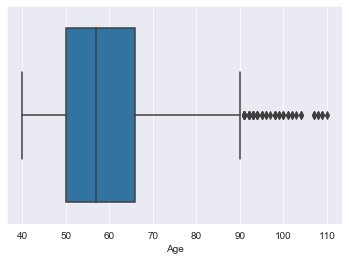

In [39]:
sns.boxplot(train['Age'])

# Create a new column for outliers, we can use Log method

In [40]:
train['AgeLog']= np.log(train['Age'])
test['AgeLog']= np.log(test['Age'])

In [41]:
train[['AgeLog', 'Age']]

,AgeLog,Age
0,3.988984,54
1,4.007333,55
2,4.007333,55
3,3.951244,52
4,3.951244,52
...,...,...
14399,4.158883,64
14400,4.158883,64
14401,4.158883,64
14402,4.143135,63


In [42]:
train['AgeLog'].max()

4.700480365792417

In [43]:
4.700480365792417-3.6888794541139363

1.0116009116784803

# Bivariate Analysis - Checking trends between 2 columns

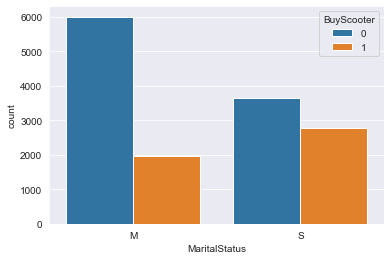

In [44]:
sns.countplot(train['MaritalStatus'], hue='BuyScooter', data=train)

In [45]:
#to carry out KD plot( to know how to understand and categorise our data, we want to save it in a function. in sns there is a facet, hue breaks down variable of interest
#kdplot is a plot type, pasplot is the function i defined
def pasplot(feature):
    facet = sns.FacetGrid(train, hue = 'BuyScooter', aspect =5)
    facet.map(sns.kdeplot, feature, shade = True)
    facet.set(xlim=(0, train[feature].max()))
    facet.add_legend()


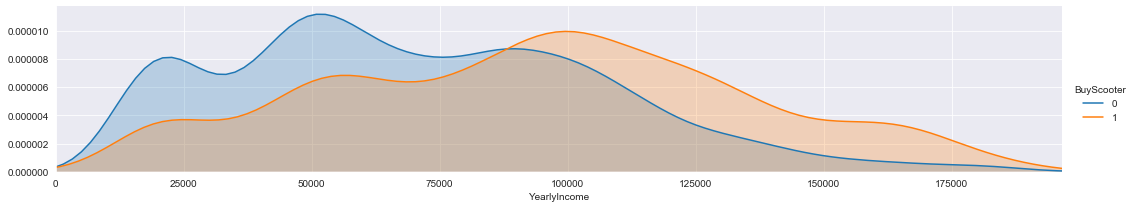

In [46]:
pasplot('YearlyIncome')

In [47]:
def YearlyIncomeGroup(train):
    if train.YearlyIncome <=85000:
        return "$0 - $85000"
    else:
        return "Over $85000"
train["YearlyIncomeGroup"] = train.apply(lambda train:YearlyIncomeGroup(train), axis=1)

In [48]:
def YearlyIncomeGroup(test):
    if test.YearlyIncome <=85000:
        return "$0 - $85000"
    else:
        return "Over $85000"
test["YearlyIncomeGroup"] = test.apply(lambda test:YearlyIncomeGroup(test), axis=1)

In [49]:
train.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year,Age,AgeLog,YearlyIncomeGroup
0,Rockhampton,Queensland,Australia,4700,Bachelors,5,M,M,1,0,0,2,137947,0,1966,54,3.988984,Over $85000
1,Seaford,Victoria,Australia,3198,Bachelors,5,M,S,0,1,3,3,101141,1,1965,55,4.007333,Over $85000
2,Hobart,Tasmania,Australia,7001,Bachelors,5,M,M,1,1,3,3,91945,0,1965,55,4.007333,Over $85000
3,North Ryde,New South Wales,Australia,2113,Bachelors,5,F,S,0,1,0,0,86688,0,1968,52,3.951244,Over $85000
4,Wollongong,New South Wales,Australia,2500,Bachelors,5,F,S,1,4,5,5,92771,1,1968,52,3.951244,Over $85000


In [50]:
train['MaritalStatus']=train['MaritalStatus'].replace({'M':1, 'S':0})

In [51]:
#Data Manipulation - To replace married and single (within maritalstatus column) to 1 or 0
test['MaritalStatus']=test['MaritalStatus'].replace({'M':1, 'S':0})

In [52]:
train['MaritalStatus'].unique()

array([1, 0], dtype=int64)

In [53]:
train.head(3)

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year,Age,AgeLog,YearlyIncomeGroup
0,Rockhampton,Queensland,Australia,4700,Bachelors,5,M,1,1,0,0,2,137947,0,1966,54,3.988984,Over $85000
1,Seaford,Victoria,Australia,3198,Bachelors,5,M,0,0,1,3,3,101141,1,1965,55,4.007333,Over $85000
2,Hobart,Tasmania,Australia,7001,Bachelors,5,M,1,1,1,3,3,91945,0,1965,55,4.007333,Over $85000


In [54]:
train['Gender'].value_counts()

M    7250
F    7154
Name: Gender, dtype: int64

In [55]:
test['Gender'].value_counts()

M    1040
F     960
Name: Gender, dtype: int64

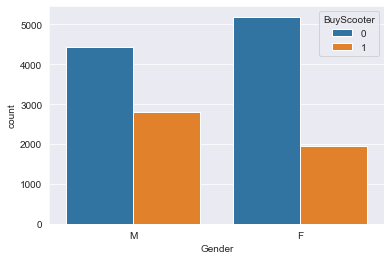

In [56]:
sns.countplot(train['Gender'], hue='BuyScooter', data=train)

In [57]:
#turning our columns automatically to binary
train['Gender']=pd.get_dummies(train['Gender'])

In [58]:
train.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year,Age,AgeLog,YearlyIncomeGroup
0,Rockhampton,Queensland,Australia,4700,Bachelors,5,0,1,1,0,0,2,137947,0,1966,54,3.988984,Over $85000
1,Seaford,Victoria,Australia,3198,Bachelors,5,0,0,0,1,3,3,101141,1,1965,55,4.007333,Over $85000
2,Hobart,Tasmania,Australia,7001,Bachelors,5,0,1,1,1,3,3,91945,0,1965,55,4.007333,Over $85000
3,North Ryde,New South Wales,Australia,2113,Bachelors,5,1,0,0,1,0,0,86688,0,1968,52,3.951244,Over $85000
4,Wollongong,New South Wales,Australia,2500,Bachelors,5,1,0,1,4,5,5,92771,1,1968,52,3.951244,Over $85000


In [59]:
#getdummies can be used since we cant rank male or females. Getdummies automatically gives it binary features
test['Gender']=pd.get_dummies(test['Gender'])

In [60]:

train['YearlyIncomeGroup']=pd.get_dummies(train['YearlyIncomeGroup'])
test['YearlyIncomeGroup']=pd.get_dummies(test['YearlyIncomeGroup'])

In [61]:
train.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year,Age,AgeLog,YearlyIncomeGroup
0,Rockhampton,Queensland,Australia,4700,Bachelors,5,0,1,1,0,0,2,137947,0,1966,54,3.988984,0
1,Seaford,Victoria,Australia,3198,Bachelors,5,0,0,0,1,3,3,101141,1,1965,55,4.007333,0
2,Hobart,Tasmania,Australia,7001,Bachelors,5,0,1,1,1,3,3,91945,0,1965,55,4.007333,0
3,North Ryde,New South Wales,Australia,2113,Bachelors,5,1,0,0,1,0,0,86688,0,1968,52,3.951244,0
4,Wollongong,New South Wales,Australia,2500,Bachelors,5,1,0,1,4,5,5,92771,1,1968,52,3.951244,0


In [62]:
test['YearlyIncomeGroup'].unique()

array([1, 0], dtype=uint64)

In [63]:
train['Education'].value_counts()

Bachelors              4191
Partial College        3905
High School            2580
Graduate Degree        2547
Partial High School    1181
Name: Education, dtype: int64

# Bivariate Analysis of Education to BuyScooter

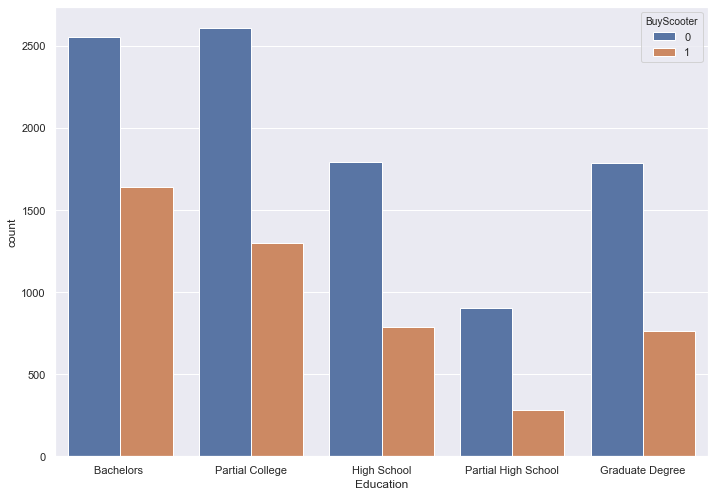

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(train['Education'], hue='BuyScooter', data=train)

In [65]:
#high school and graduate degrees have similar numbers and trends, we will group them as one. We will rank them according to their appearance.
#Label encoding ranks according to value counts 
test['Education']=test['Education'].replace({'Graduate Degree':3, 'Bachelors ':5, 'Partial College':4, 'High School':3, 'Partial High School':3})
train['Education']=train['Education'].replace({'Graduate Degree':3, 'Bachelors ':5, 'Partial College':4, 'High School':3, 'Partial High School':3})

In [66]:
train['Education'].unique()

array([5, 4, 3], dtype=int64)

In [67]:
train.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year,Age,AgeLog,YearlyIncomeGroup
0,Rockhampton,Queensland,Australia,4700,5,5,0,1,1,0,0,2,137947,0,1966,54,3.988984,0
1,Seaford,Victoria,Australia,3198,5,5,0,0,0,1,3,3,101141,1,1965,55,4.007333,0
2,Hobart,Tasmania,Australia,7001,5,5,0,1,1,1,3,3,91945,0,1965,55,4.007333,0
3,North Ryde,New South Wales,Australia,2113,5,5,1,0,0,1,0,0,86688,0,1968,52,3.951244,0
4,Wollongong,New South Wales,Australia,2500,5,5,1,0,1,4,5,5,92771,1,1968,52,3.951244,0


In [68]:
train['CountryRegionName'].unique()

array(['Australia', 'United States', 'Canada', 'Germany',
       'United Kingdom', 'France'], dtype=object)

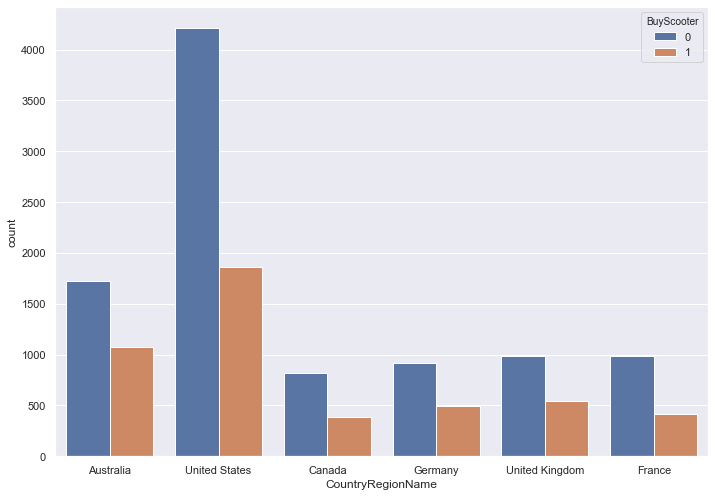

In [69]:
sns.countplot(train['CountryRegionName'], hue='BuyScooter', data=train)

In [70]:
train = pd.get_dummies(train, columns = ['CountryRegionName'], drop_first = True)
#drop_first to to avoid noisy parameters


In [71]:
test = pd.get_dummies(test, columns = ['CountryRegionName'], drop_first = True)

In [72]:
train.head()

,City,StateProvinceName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,...,BuyScooter,Year,Age,AgeLog,YearlyIncomeGroup,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States
0,Rockhampton,Queensland,4700,5,5,0,1,1,0,0,...,0,1966,54,3.988984,0,0,0,0,0,0
1,Seaford,Victoria,3198,5,5,0,0,0,1,3,...,1,1965,55,4.007333,0,0,0,0,0,0
2,Hobart,Tasmania,7001,5,5,0,1,1,1,3,...,0,1965,55,4.007333,0,0,0,0,0,0
3,North Ryde,New South Wales,2113,5,5,1,0,0,1,0,...,0,1968,52,3.951244,0,0,0,0,0,0
4,Wollongong,New South Wales,2500,5,5,1,0,1,4,5,...,1,1968,52,3.951244,0,0,0,0,0,0


In [73]:
train.drop('StateProvinceName', axis = 1, inplace = True)

In [74]:
test.drop('StateProvinceName', axis = 1, inplace = True)

In [75]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [76]:
train['City'].value_counts()

London                   334
Paris                    289
Beaverton                171
Bellingham               170
Burien                   163
Concord                  161
Chula Vista              157
Berkeley                 155
Beverly Hills            153
Burbank                  145
Cliffside                144
Burlingame               142
Bellflower               141
Bremerton                141
Berlin                   139
Colma                    131
Coronado                  95
Cranbourne                91
York                      90
Caloundra                 89
Goulburn                  89
Sydney                    89
El Cajon                  88
Shawnee                   88
National City             87
Downey                    87
Hobart                    85
Geelong                   84
Melton                    84
Sunbury                   83
Lincoln Acres             83
Grossmont                 83
Bendigo                   82
Brisbane                  82
Wollongong    

In [77]:
#replace cities by the frequency of appearance
train['City']=train['City'].map(train['City'].value_counts().to_dict())

In [78]:
test['City']=test['City'].map(test['City'].value_counts().to_dict())

In [79]:
train.head()

,City,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,Year,Age,AgeLog,YearlyIncomeGroup,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States
0,73,4700,5,5,0,1,1,0,0,2,137947,0,1966,54,3.988984,0,0,0,0,0,0
1,68,3198,5,5,0,0,0,1,3,3,101141,1,1965,55,4.007333,0,0,0,0,0,0
2,85,7001,5,5,0,1,1,1,3,3,91945,0,1965,55,4.007333,0,0,0,0,0,0
3,67,2113,5,5,1,0,0,1,0,0,86688,0,1968,52,3.951244,0,0,0,0,0,0
4,82,2500,5,5,1,0,1,4,5,5,92771,1,1968,52,3.951244,0,0,0,0,0,0


In [80]:
train['PostalCode'].value_counts()

97005         171
91950         170
98225         170
98168         163
94519         161
91910         157
94704         155
90210         153
V9            151
91502         144
V8Y 1L1       144
V7L 4J4       143
94010         142
98312         141
90706         141
94014         131
2036          126
92118          95
3977           91
1002           89
4551           89
2580           89
92020          88
90241          87
7001           85
3220           84
3337           84
3429           83
91941          83
91932          82
2500           82
3550           82
4000           82
4217           81
98036          81
97355          81
98403          81
2450           80
3000           80
90802          79
92102          79
91776          79
V8P            79
4810           78
4655           77
99362          77
91940          76
98284          76
97222          76
3280           76
95062          76
91977          76
98027          76
91945          75
97301          75
90505     

In [81]:
#drop postal code since it is tied to City
train.drop('PostalCode', axis=1, inplace=True)

In [82]:
test.drop('PostalCode', axis=1, inplace=True)

In [83]:
train.shape

(14404, 20)

In [84]:
test.shape

(2000, 19)

In [85]:
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)

# Select Feature for Training

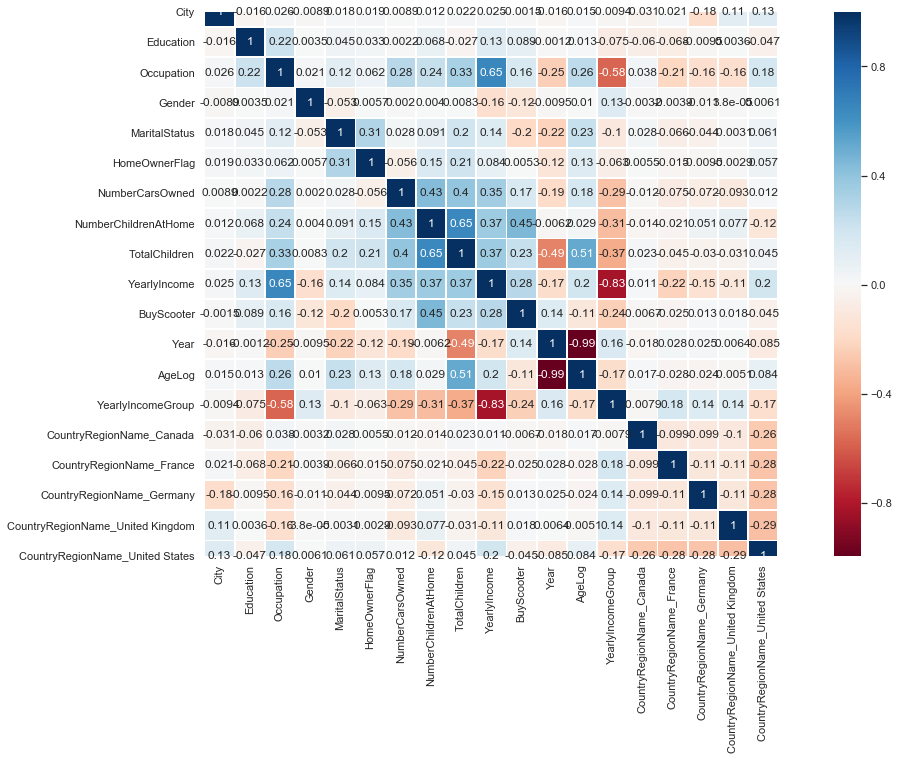

In [86]:
corrmat =train.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

# Modelling

In [87]:
#Split train data into 70-30, then train with the 70%, and predict with the 30%, before predicting the test data
x =train.drop('BuyScooter', axis =1)#our x are the features and y is the target. 
y =train['BuyScooter']

In [88]:
x.head()

,City,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Year,AgeLog,YearlyIncomeGroup,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States
0,73,5,5,0,1,1,0,0,2,137947,1966,3.988984,0,0,0,0,0,0
1,68,5,5,0,0,0,1,3,3,101141,1965,4.007333,0,0,0,0,0,0
2,85,5,5,0,1,1,1,3,3,91945,1965,4.007333,0,0,0,0,0,0
3,67,5,5,1,0,0,1,0,0,86688,1968,3.951244,0,0,0,0,0,0
4,82,5,5,1,0,1,4,5,5,92771,1968,3.951244,0,0,0,0,0,0


In [89]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: BuyScooter, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [92]:
from sklearn.ensemble import RandomForestClassifier

predictor = RandomForestClassifier(n_estimators=400, random_state=42)
predictor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [93]:
ypred =predictor.predict(X_val) #predicting for the remaining 30% of the train, y_val is the target of the 30%

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred, y_val)

0.7804257288292458

In [95]:
predictor = predictor.predict(test)

In [96]:
predictor

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [97]:
testx = pd.read_csv('testdata.csv')

In [98]:
xfinal =pd.DataFrame({'CustomerID': testx['CustomerID']}) #we reloaded the dataset with another variable, in order to extract the Customer ID
yfinal = pd.DataFrame ({'BuyScooter' :predictor})  #we stored prediction into a dataframe for buysccoter

In [99]:
submission =pd.concat([xfinal, yfinal], axis ='columns')
submission.head()


,CustomerID,BuyScooter
0,27219,0
1,27220,0
2,27221,0
3,27222,0
4,27223,0


In [100]:
submission.to_csv('firstprediction2.csv', index=False)